In [2]:
import warnings
from math import*
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import time
import pickle
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.io as scio
from scipy.stats import norm
import statsmodels.api as sm
#coding=utf-8

1. 試用部分選主元的高斯消元法，求解下列線性方程組的根。

In [4]:
def myfun_Equation_GEPivot(A,b):
    Au=np.concatenate((A,b),axis=1)
    n=len(Au[:,0])
    k=0
    while k<n:
        #选主元
        Au=myfun_choose_pivot(Au,k)
        #高斯消元
        Au=myfun_GussianElemination(Au,k)
        k=k+1
    #回代球根
    print(Au)
    U=Au[:,0:n]
    g=Au[:,n]
    root=myfun_BlackInteration(U,g,n)
    return root

def myfun_choose_pivot(Au,k):
    B=Au[k:,k:]
    imb=np.argmax(np.abs(B[:,0]))#下标每一行每一列最大值
    if imb!=0:
        B1=B[0,:].copy()
        B[0,:]=B[imb,:]
        B[imb,:]=B1
    Au[k:,k:]=B
    return Au

def myfun_GussianElemination(Au,k):#高斯消
    rowk=Au[k,:]
    matrix_underk=Au[k+1:,:]#剩下
    for i in range(len(matrix_underk[:,0])):
        mk=matrix_underk[i,k]/rowk[k]#乘数
        matrix_underk[i,:]=matrix_underk[i,:]-mk*rowk
    Au[k+1:,:]=matrix_underk
    return Au


def myfun_BlackInteration(U,g,n):#回代求根
    x=np.zeros([n,1])
    x[n-1]=g[n-1]/U[n-1,n-1]#python从0
    for i in range(n-2,-1,-1):
        x[i]=(g[i]-np.dot(U[i,i+1:],x[i+1:]))/U[i,i]
    root=x
    return root
A1=np.array([[2,1,-1,2],[4,4,1,3],[-6,-1,10,10],[-2,1,8,4]])
b1=np.array([[2],[4],[-5],[1]])
root=myfun_Equation_GEPivot(A1,b1)
print(root)

#lu分解


A=np.array([[2,1,-1,2],[4,4,1,3],[-6,-1,10,10],[-2,1,8,4]])
b=np.array([2,4,-5,1])
n=len(A)
def lu(A1):
    n=len(b1)#单位矩阵4
    L = np.eye(len(A1))#单位矩阵
    U = np.zeros(np.shape(A1))#0矩阵
    for k in range(n):
        U[0, 0] = A1[0, 0]
        if k==0:
            for r in range(1, n):# 求U的第一行和L的第一列
                U[0, r ] = A1[0, r ]#L的第一行成以U的每一列姐U第一行
                L[r, 0] = A1[r, 0]/U[0,0]
        else:
            for j in range(k, n):#k=1开始
                m = 0
                for r in range(k):#计算U日r从0
                    m += L[k, r] * U[r, j]#1,0*0,1L每一行成以U第j列
                U[k, j] = A1[k, j] - m
            for i in range(k + 1, n):#从第二行开始
                m = 0
                for r in range(k):
                    m += L[i, r] * U[r, k]
                L[i, k] = (A1[i, k] - m) / U[k, k]
            # for i in range(k,n):
            #     U[i,i+1]=A1[i,i:n]-L[i,1:i-1]*U[1:i-1,i:n]
            #     L[i+1,:]=(A1[i+1,:]-L[i+1,:i-1]*U[1:i,i])/U[i,i]
    print("L={}".format(L), "U={}".format(U))
    return L,U



def my_LUsolve(A1,b1):
    L, U = lu(A1) # 得到L和U
    # 求解线性方程LY=b
    n = len(A1)
    y = np.zeros((n, 1))
    x = np.zeros((n, 1))
    y[0]=b1[0]#y1=b1
    for k in range(1,n):
        # y[i]=b1[i]-L[i,i:n]*y[0,0:i-1]
        m=0
        for r in range(1, n):
            m += L[k, r] * y[r]
        y[k] -= m
        print("y={}".format(y))
    for h in range(n-1,-1,1):
        x[h]=(y(h)-U[h,h+1:n],x[h+1:n])/U[h,h]
    return x
x = my_LUsolve(A1, b1)
print(x)


[[-6 -1 10 10 -5]
 [ 0  3  7  9  0]
 [ 0  0  2  5  0]
 [ 0  0  0 -5  2]]
[[ 2.02222222]
 [-1.13333333]
 [ 1.        ]
 [-0.4       ]]
L=[[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [-3.  1.  1.  0.]
 [-1.  1.  1.  1.]] U=[[  2.   1.  -1.   2.]
 [  0.   2.   3.  -1.]
 [  0.   0.   4.  17.]
 [  0.   0.   0. -10.]]
y=[[2.]
 [0.]
 [0.]
 [0.]]
y=[[2.]
 [0.]
 [0.]
 [0.]]
y=[[2.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]]


2.	用LU分解法求解第1题中的线性方程组。

In [5]:
def LU_mat(A):  # 分解矩阵A的函数，得到L和U:
    L = np.eye(len(A))
    U = np.zeros(np.shape(A))
    for k in range(n):
        U[0, 0] = A[0, 0]
        if k == 0:
            for j in range(1, n):
                U[0, j] = A[0, j]
                L[j, 0] = A[j, 0] / U[0, 0]
        else:
            for j in range(k, n):
                m = 0
                for r in range(k):
                    m += L[k, r] * U[r, j]
                U[k, j] = A[k, j] - m
            for i in range(k + 1, n):
                m = 0
                for r in range(k):
                    m += L[i, r] * U[r, k]
                L[i, k] = (A[i, k] - m) / U[k, k]
    print("L={}".format(L), "U={}".format(U))
    return L, U


def LU_fun(A, b):  # 定义一个LU分解函数，自变量是A,b
    m1, m2 = A.shape  # m,n分别代表矩阵A的行数和列数

    if A[0, 0] == 0:
        print("no answer")
    if m1 < m2:
        print("这是一个解空间")
    else:
        L, U = LU_mat(A)
        y = b
        for k in range(1, n):
            m = 0
            for r in range(k):
                m += L[k, r] * y[r]
            y[k] -= m
        print("y={}".format(y))
        x = y
        x[n - 1] = y[n - 1] / U[n - 1, n - 1]
        for i in range(n - 2, -1, -1):
            m = 0
            for k in range(i + 1, n):
                m += U[i, k] * x[k]
            x[i] = (x[i] - m) / U[i, i]
    print("x={}".format(x))
    return x

LU_fun(A, b)

L=[[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [-3.  1.  1.  0.]
 [-1.  1.  1.  1.]] U=[[  2.   1.  -1.   2.]
 [  0.   2.   3.  -1.]
 [  0.   0.   4.  17.]
 [  0.   0.   0. -10.]]
y=[2 0 1 2]
x=[1 0 0 0]


array([1, 0, 0, 0])

3. 已知 Fama-French 三因子模型：

其中ri為投資組合i的收益率，rm為市場收益率，SMB是公司規模因子，HML是公司價值因子，rf是無風險利率。請結合最小二乘參數估計原理寫出估計三因子模型參數的方程組，並結合所提供的數據分別用選主元的高斯消元法和 LU 分解法計算模型參數。

In [6]:
data=pd.read_csv("20211109-Python-实验数据-因子模型估参.csv",encoding = 'gb2312')
data1=pd.DataFrame(data)
data1.columns=['日期','市场指数','组合1','组合2','组合3','组合4','组合5','无风险利率','SMB','HML']
X1=data1['市场指数'] #自变量1市场指数
X2 = data1['组合1'] #自变量2组合1
X3 = data1['组合2'] #自变量3组合2
X4 = data1['组合3'] #自变量4组合3
X5 = data1['组合4']#自变量4组合4
X6 = data1['组合5']#自变量5组合5
X7 =data1['无风险利率']#自变量6无风险利率
X8 = data1['SMB']#自变量7SMB
X9 = data1['HML']#自变量8HML
Y = data1['组合1']-data1['无风险利率'] #因变量ri-rf
Y1 = data1['组合2']-data1['无风险利率'] #因变量ri-rf
Y2 = data1['组合3']-data1['无风险利率']#因变量ri-rf
Y3 = data1['组合4']-data1['无风险利率']#因变量ri-rf
Y4 = data1['组合5']-data1['无风险利率']#因变量ri-rf
K=X1-X7
data1['constant']=np.ones(data1.shape[0])#常数
x_data=pd.concat([data1['constant'],K,X8,X9],axis=1)
y_data=Y
y_data1=Y1
y_data2=Y2
y_data3=Y3
y_data4=Y4
model=sm.OLS(y_data,x_data).fit()
model1=sm.OLS(y_data1,x_data).fit()
model2=sm.OLS(y_data2,x_data).fit()
model3=sm.OLS(y_data3,x_data).fit()
model4=sm.OLS(y_data4,x_data).fit()
print(model4.params)
print(model4.resid)

data= pd.read_csv("20211109-Python-实验数据-因子模型估参.csv",encoding = 'gb2312')
data1=pd.DataFrame(data)
data1.columns=['日期','市场指数','组合1','组合2','组合3','组合4','组合5','无风险利率','SMB','HML']
X1=data1['市场指数'] #自变量1市场指数
X2 = data1['组合1'] #自变量2组合1
X3 = data1['组合2'] #自变量3组合2
X4 = data1['组合3'] #自变量4组合3
X5 = data1['组合4']#自变量4组合4
X6 = data1['组合5']#自变量5组合5
X7 =data1['无风险利率']#自变量6无风险利率
X8 = data1['SMB']#自变量7SMB
X9 = data1['HML']#自变量8HML
Y = data1['组合1']-data1['无风险利率'] #因变量ri-rf
Y1 = data1['组合2']-data1['无风险利率'] #因变量ri-rf
Y2 = data1['组合3']-data1['无风险利率']#因变量ri-rf
Y3 = data1['组合4']-data1['无风险利率']#因变量ri-rf
Y4 = data1['组合5']-data1['无风险利率']#因变量ri-rf
K=X1-X7
data1['rm-rf']=K
y=np.sum(Y)
x1y=np.sum(K*Y)
x2y=np.sum(X8*Y)
x3y=np.sum(X9*Y)
n=len(X1)
x1=np.sum(K)
x2=np.sum(X8)
x3=np.sum(X9)
nx1=np.sum(n*K)
nx2=np.sum(n*X8)
nx3=np.sum(n*X9)
X11=np.sum(K**2)
X12=np.sum(K*X8)
X13=np.sum(K*X9)
X22=np.sum(X8**2)
X23=np.sum(X8*X9)
X33=np.sum(X9**2)



A=np.array([[n],[x1],[x2],[x3]])
B=np.array([[nx1],[X11],[X12],[X13]])
C=np.array([[nx2], [X12], [X22], [X23]])
D=np.array([[nx3], [X13], [X23], [X33]])
H=np.array([y, x1y, x2y, x3y])
E=np.hstack((A,B))
F =np.hstack((E, C))
G=np.hstack((F, D))
n1=len(G)
#第三题的Lu分解
def LU_mat(G):  # 分解矩阵G的函数，得到L和U:
    L = np.eye(len(G))
    U = np.zeros(np.shape(G))
    for k in range(n1):
        U[0, 0] = G[0, 0]
        if k == 0:
            for j in range(1, n1):
                U[0, j] = G[0, j]
                L[j, 0] = G[j, 0] / U[0, 0]
        else:
            for j in range(k, n1):
                m = 0
                for r in range(k):
                    m += L[k, r] * U[r, j]
                U[k, j] = G[k, j] - m
            for i in range(k + 1, n1):
                m = 0
                for r in range(k):
                    m += L[i, r] * U[r, k]
                L[i, k] = (G[i, k] - m) / U[k, k]
    print("L={}".format(L), "U={}".format(U))
    return L, U


def LU_fun(G, H):  # 定义一个LU分解函数，自变量是A,b
    m1, m2 = G.shape  # m,n分别代表矩阵A的行数和列数

    if G[0, 0] == 0:
        print("no answer")
    if m1 < m2:
        print("这是一个解空间")
    else:
        L, U = LU_mat(G)
        y = H
        for k in range(1, n1):
            m = 0
            for r in range(k):
                m += L[k, r] * y[r]
            y[k] -= m
        print("y={}".format(y))
        x = y
        x[n1 - 1] = y[n1 - 1] / U[n1 - 1, n1 - 1]
        for i in range(n1 - 2, -1, -1):
            m = 0
            for k in range(i + 1, n1):
                m += U[i, k] * x[k]
            x[i] = (x[i] - m) / U[i, i]
    print("x={}".format(x))
    return x

LU_fun(G, H)

constant    -271.955117
0              1.774047
SMB        -1525.164811
HML         5093.793872
dtype: float64
0      -1277.210780
1      -1243.201255
2      -1299.782537
3      -1317.081398
4      -1292.647914
           ...     
2422    1086.512834
2423    1103.206060
2424    1025.120932
2425     984.842865
2426    1025.445993
Length: 2427, dtype: float64
L=[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.78585543e+03  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.76885043e-04  1.71180416e-07  1.00000000e+00  0.00000000e+00]
 [-4.06262876e-05 -1.45795524e-08 -4.64748902e-01  1.00000000e+00]] U=[[ 2.42700000e+03  1.64096050e+10  2.80900980e+03 -2.39302200e+02]
 [ 0.00000000e+00 -4.56952354e+13 -7.82212938e+06  6.66216078e+05]
 [ 0.00000000e+00  0.00000000e+00  1.35357878e-01 -6.29074251e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.65379554e-02]]
y=[ 5.10202190e+06  8.90096874e+07  2.48699169e+02 -2.14626215e+02]
x=[ 2.11527291e+03 -6.98058367

array([ 2.11527291e+03, -6.98058367e-05,  7.30916502e+01, -3.79614391e+03])

4. 已知預測金融資產價格崩盤的對數週期性冪律奇異性模型為：

若對上式最後一項其做三角展開，可得：

現已知 tc = 20161025, m = 0.2932, ω = 6.1023, 請結合所給的資產價格數據估計 A, B, C1, C2。
時間處理提示：選擇一個基準時間比如20160101，把交易日期和給定的tc轉化為以基準時間為起點的相對時間（以天為單位），再估計參數A，B，C1，C2。相對時間Python編程思路:計算距離基準時間的時間差再除以np.timedelta64(1, 'D').

A     7.410077
B    -0.201174
C1    0.012463
C2    0.003433
dtype: float64
时间
2016-01-04    0.042784
2016-01-05    0.052221
2016-01-06    0.032886
2016-01-07    0.029689
2016-01-08    0.030092
                ...   
2016-10-12    0.011518
2016-10-13   -0.009259
2016-10-14    0.015165
2016-10-17   -0.010755
2016-10-18    0.006432
Length: 191, dtype: float64


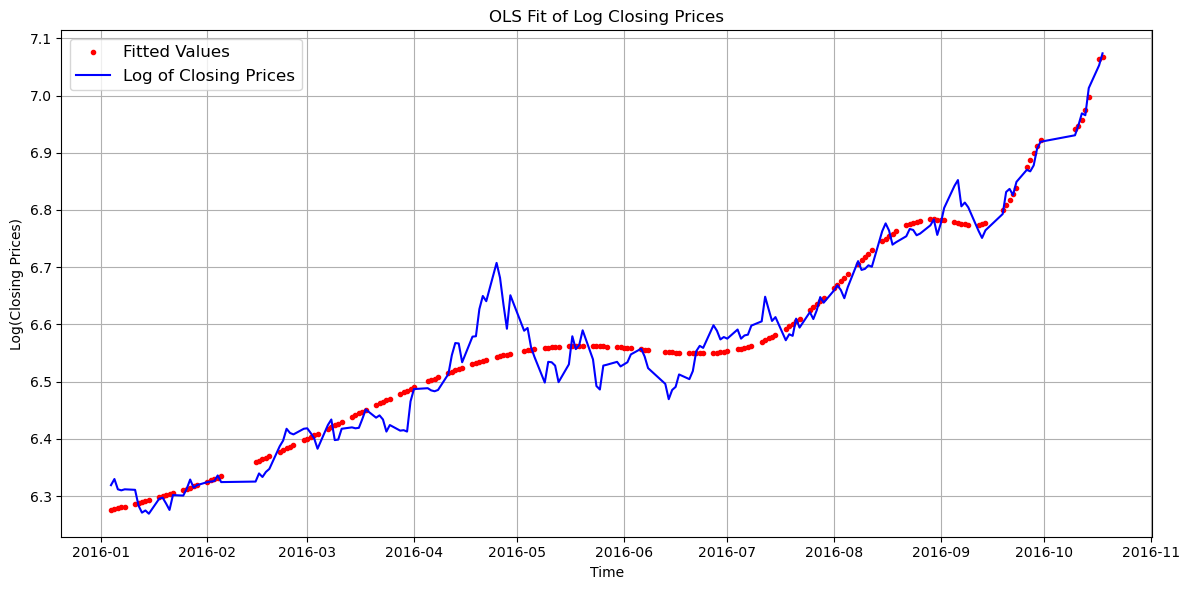

L=[[ 1.          0.          0.          0.        ]
 [ 4.19557948  1.          0.          0.        ]
 [-0.31710228 -0.07546029  1.          0.        ]
 [ 0.85265335  0.20306595 -0.04640419  1.        ]] U=[[ 1.91000000e+02  1.53058935e+05 -1.15682084e+04  3.11056467e+04]
 [ 0.00000000e+00 -6.38676453e+05  4.81947084e+04 -1.29693439e+05]
 [ 0.00000000e+00  0.00000000e+00  1.82107991e+03 -8.45057337e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.45194105e+03]]
y=[时间
 2016-01-04    6.569728
 2016-01-05    6.569728
 2016-01-06    6.569729
 2016-01-07    6.569729
 2016-01-08    6.569729
                 ...
 2016-10-12    6.569710
 2016-10-13    6.569710
 2016-10-14    6.569709
 2016-10-17    6.569707
 2016-10-18    6.569707
 Name: 收盘, Length: 191, dtype: float64
 时间
 2016-01-04   -27.568483
 2016-01-05   -27.568482
 2016-01-06   -27.568484
 2016-01-07   -27.568484
 2016-01-08   -27.568484
                 ...
 2016-10-12   -27.568401
 2016-10-13   -27.568401
 2016-10-14   -2

array([时间
       2016-01-04   -0.000192
       2016-01-05   -0.000192
       2016-01-06   -0.000192
       2016-01-07   -0.000192
       2016-01-08   -0.000192
                       ...
       2016-10-12   -0.000192
       2016-10-13   -0.000192
       2016-10-14   -0.000192
       2016-10-17   -0.000192
       2016-10-18   -0.000192
       Name: 收盘, Length: 191, dtype: float64,
       时间
       2016-01-04    0.000046
       2016-01-05    0.000046
       2016-01-06    0.000046
       2016-01-07    0.000046
       2016-01-08    0.000046
                       ...
       2016-10-12    0.000046
       2016-10-13    0.000046
       2016-10-14    0.000046
       2016-10-17    0.000046
       2016-10-18    0.000046
       Name: 收盘, Length: 191, dtype: float64,
       时间
       2016-01-04    0.000012
       2016-01-05    0.000012
       2016-01-06    0.000012
       2016-01-07    0.000012
       2016-01-08    0.000012
                       ...
       2016-10-12    0.000012
       2016-10-13

In [8]:
# Load data
data2 = pd.read_csv('20211109-Python-实验数据-LPPLS模型估参.csv', encoding='gb2312')

# Constants
tc = datetime.datetime.strptime('2016-10-25', '%Y-%m-%d')
m = 0.2932
omega = 6.1023

# DataFrame setup
data3 = pd.DataFrame(data2)
data3.columns = ['时间', '收盘']
data3['时间'] = pd.to_datetime(data3['时间'])
data3.set_index('时间', inplace=True)

# Log transform of closing prices
y = np.log(data3['收盘'])

# Calculate deltatime in days
data3['deltatime'] = (tc - data3.index).total_seconds() / (24 * 3600)

# Model variables
x1 = (data3['deltatime']) ** m
x2 = (data3['deltatime']) ** m * np.cos(omega * np.log(data3['deltatime']))
x3 = (data3['deltatime']) ** m * np.sin(omega * np.log(data3['deltatime']))

# Prepare data for OLS
x_data = pd.DataFrame({
    'A': np.ones(data3.shape[0]),
    'B': x1,
    'C1': x2,
    'C2': x3
})

# Fit OLS model
model4 = sm.OLS(y, x_data).fit()
print(model4.params)
print(model4.resid)

# Predictions
y1 = model4.predict(x_data)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data3.index, y1, 'r.', label='Fitted Values')
plt.plot(data3.index, y, 'b-', label='Log of Closing Prices')
plt.title('OLS Fit of Log Closing Prices')
plt.xlabel('Time')
plt.ylabel('Log(Closing Prices)')
plt.legend(fontsize=12, loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
def LU_mat(G):  # 分解矩阵G的函数，得到L和U:
    L = np.eye(len(G))
    U = np.zeros(np.shape(G))
    for k in range(n1):
        U[0, 0] = G[0, 0]
        if k == 0:
            for j in range(1, n1):
                U[0, j] = G[0, j]
                L[j, 0] = G[j, 0] / U[0, 0]
        else:
            for j in range(k, n1):
                m = 0
                for r in range(k):
                    m += L[k, r] * U[r, j]
                U[k, j] = G[k, j] - m
            for i in range(k + 1, n1):
                m = 0
                for r in range(k):
                    m += L[i, r] * U[r, k]
                L[i, k] = (G[i, k] - m) / U[k, k]
    print("L={}".format(L), "U={}".format(U))
    return L, U


def LU_fun(G, H):  # 定义一个LU分解函数，自变量是A,b
    m1, m2 = G.shape  # m,n分别代表矩阵A的行数和列数

    if G[0, 0] == 0:
        print("no answer")
    if m1 < m2:
        print("这是一个解空间")
    else:
        L, U = LU_mat(G)
        y = H
        for k in range(1, n1):
            m = 0
            for r in range(k):
                m += L[k, r] * y[r]
            y[k] -= m
        print("y={}".format(y))
        x = y
        x[n1 - 1] = y[n1 - 1] / U[n1 - 1, n1 - 1]
        for i in range(n1 - 2, -1, -1):
            m = 0
            for k in range(i + 1, n1):
                m += U[i, k] * x[k]
            x[i] = (x[i] - m) / U[i, i]
    print("x={}".format(x))
    return x

LU_fun(G, H)